# HAWKING PARTNER

This tutorial shows how the Hotta-Schutzhold-Unruh formula for the partner of a Hawking mode can be used to compute the Logarithmic Negativity as an efficient computational alternative of the FullLogNeg. This tutorial assumes that the basic_tutorial has already been seen.

Note that this formula only allows for initial pure states (not valid for states with some temperature).

In [1]:
import sys
import os
repoRoot = os.path.abspath(os.path.join('..'))
sys.path.append(repoRoot)

from src.LogNegManager import LogNegManager
from src.TypesAndParameters import TypeOfMeasurement, InitialStateParameters, TransformationMatrixParameters, MeasurementParameters, GeneralOptionsParameters

## Stating the parameters of the simulation and the measurements

We will define the same kind of parameters as before, with a list of initial states. The difference now will be the measurements to be applied. For the Hawking-Partner we have to specifiy the criterion to construct the partner (if one does not specify it, criterion B1 will be used). In several situations criterion B2 cannot be used as some conditions are not fulfilled.

In [2]:
generalOptions =  {
        GeneralOptionsParameters.NUM_MODES.value: 10,
        GeneralOptionsParameters.PLOTS_DIRECTORY.value: "./plots/10-plots/",
        GeneralOptionsParameters.DATA_DIRECTORY.value: "./data/10-data/",
        GeneralOptionsParameters.BASE_DIRECTORY.value: "../",
        GeneralOptionsParameters.PARALLELIZE.value: True
      }

transformationMatrixOptions = {
        TransformationMatrixParameters.DATA_DIRECTORY.value: "../example_data/10modes/",
        TransformationMatrixParameters.INSTANT_TO_PLOT.value: -1
      }

initialStates = [
          {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # Vacuum

            {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 5.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # One mode squeezed

            {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.5}, # Two mode squeezed


        ]

measurements = [
        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value}, # 1 vs (N-1) LogNeg for all modes onto the out state (default)

        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value,
         MeasurementParameters.SPECIAL_INFO.value: "B1"},      # H vs P Log Neg for modes onto the out state
      ]

## Perform the measurements

Here the computational advantage may not be observed due to the low amount of modes (10) in play.

In [3]:
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions, initialStates=initialStates)

collection_of_dict_to_plot = []
for measurement in measurements:
    collection_of_dict_to_plot.append(LNManager.measureEntanglement(measurement))

## Visualize the results

We will first visualize them as usual, having two different plots for every measurement

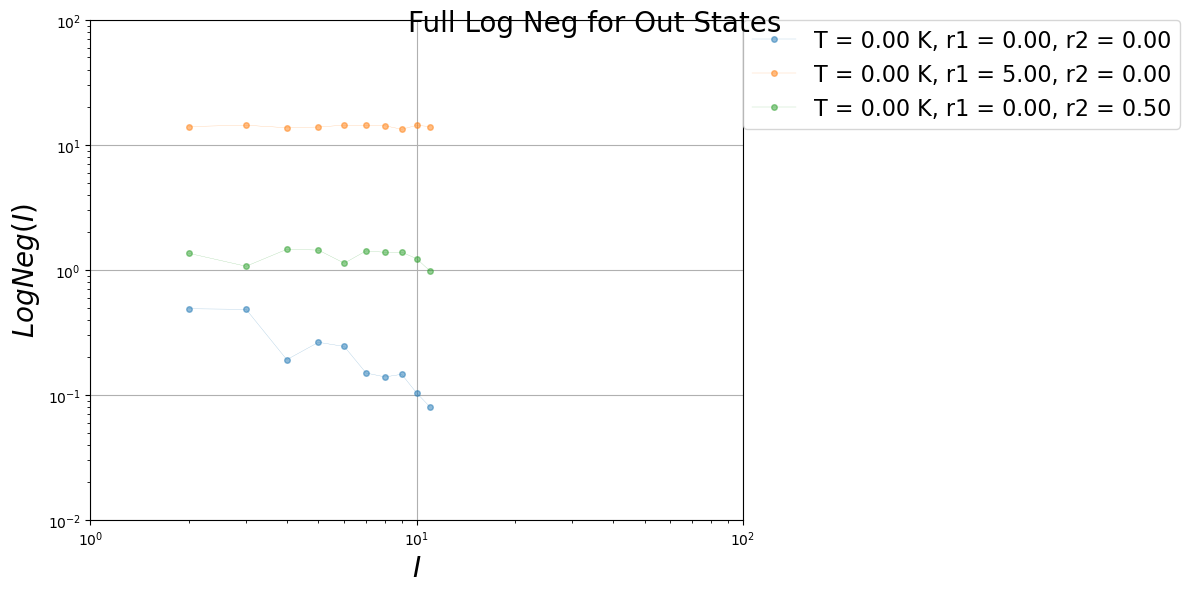

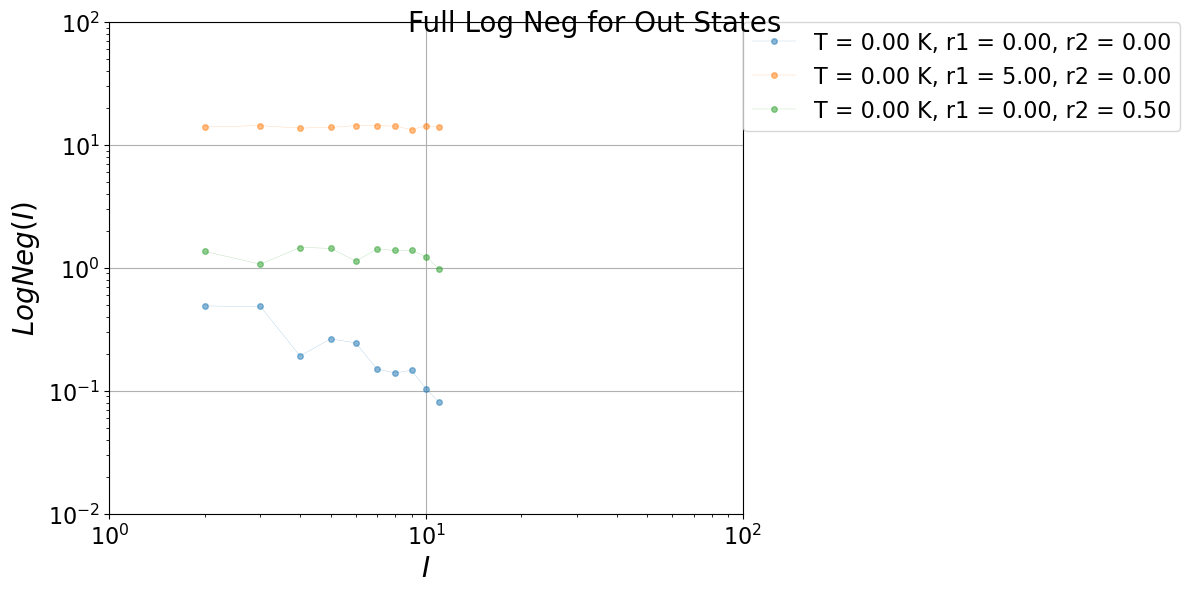

In [4]:
for dict_to_plot in collection_of_dict_to_plot:
    LNManager.plotResults(dict_to_plot)

But we can also use a different method to compute a difference between the two measurements. In this case, as we have few modes, numerical errors does not appear and the partner formula finds exactly the same Logirthmic Negativity.

/home/josema/Documentos/universidad/granada/6Sexto/TFG/Scripts/LogNeg4gs/src/PlotsManager.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xlim(1, x_max)


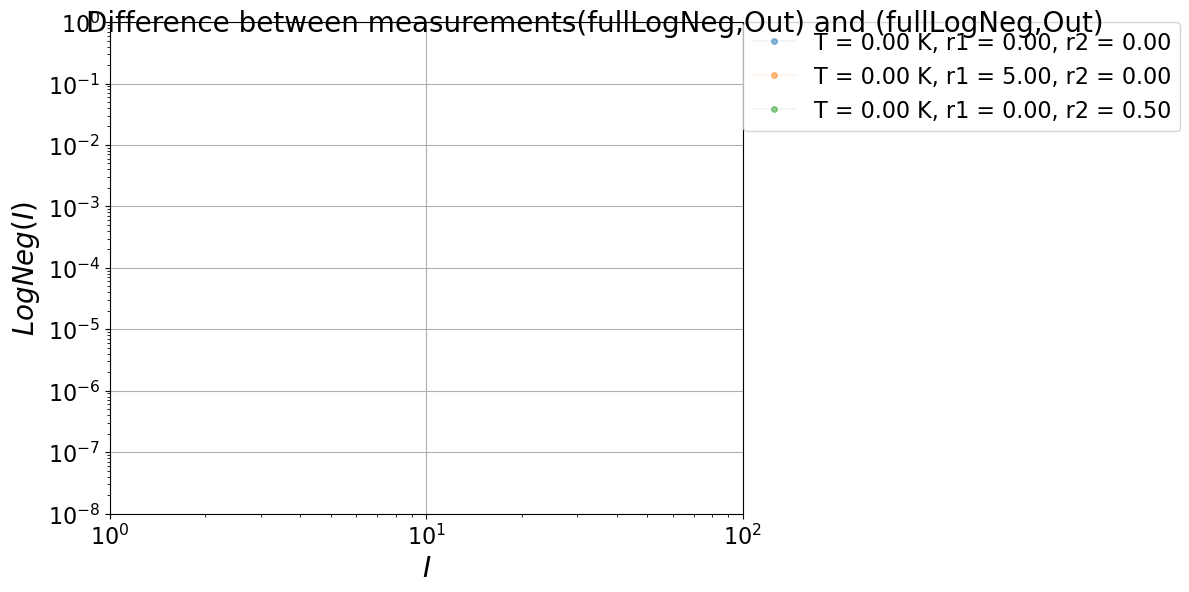

In [6]:
comparisonDict = LNManager.computeDifferenceBetweenMeasurements(measurements[0], measurements[1])
LNManager.plotResults(comparisonDict)